In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from GeneTEA.eval.plotting import *
from GeneTEA.eval.benchmarking_tests import *
from GeneTEA.utils import download_to_cache_ext
from GeneTEA.train import load_models
tea = load_models("../trained_models", "GeneTEA")
comps = Competitors()
tea.tfidfs.shape

(35818, 24831)

# Replace paths below

Note: download_to_cache_ext is a wrapper function to get a local filepath.

In [3]:
v=22
FILEPATHS = {
    "false_discovery":download_to_cache_ext(f"genetea-manuscript-bb10.{v}/false_discoveries", format="table"),
    "EF_hand":download_to_cache_ext(f"genetea-manuscript-bb10.{v}/EF_hand_example", format="table"),
    "Hallmark_subsamples_indiv":download_to_cache_ext(f"genetea-manuscript-bb10.{v}/Hallmark_subsamples_indiv", format="table"),
    "Hallmark_combo_indiv":download_to_cache_ext(f"genetea-manuscript-bb10.{v}/Hallmark_combo_indiv", format="table"),
    "Hallmark_subsamples_scores":download_to_cache_ext(f"genetea-manuscript-bb10.{v}/Hallmark_subsamples_scores", format="table"),
    "Hallmark_combo_scores":download_to_cache_ext(f"genetea-manuscript-bb10.{v}/Hallmark_combo_scores", format="table"),
    "AlphaFold2_Protein_Clusters_indiv":download_to_cache_ext(f"genetea-manuscript-bb10.{v}/AlphaFold2_Protein_Clusters_indiv", format="table"),
    "BioID_Interacting_Proteins_indiv":download_to_cache_ext(f"genetea-manuscript-bb10.{v}/BioID_Interacting_Proteins_indiv", format="table"),
    "Rare_Variant_GWAS_indiv":download_to_cache_ext(f"genetea-manuscript-bb10.{v}/Rare_Variant_GWAS_indiv", format="table"),
    "Perturb-seq_Expression_Modules_indiv":download_to_cache_ext(f"genetea-manuscript-bb10.{v}/Perturb-seq_Expression_Modules_indiv", format="table"),
    "Perturb-seq_Perturbation_Clusters_indiv":download_to_cache_ext(f"genetea-manuscript-bb10.{v}/Perturb-seq_Perturbation_Clusters_indiv", format="table"),
    "AlphaFold2_Protein_Clusters_scores":download_to_cache_ext(f"genetea-manuscript-bb10.{v}/AlphaFold2_Protein_Clusters_scores", format="table"),
    "BioID_Interacting_Proteins_scores":download_to_cache_ext(f"genetea-manuscript-bb10.{v}/BioID_Interacting_Proteins_scores", format="table"),
    "Rare_Variant_GWAS_scores":download_to_cache_ext(f"genetea-manuscript-bb10.{v}/Rare_Variant_GWAS_scores", format="table"),
    "Perturb-seq_Expression_Modules_scores":download_to_cache_ext(f"genetea-manuscript-bb10.{v}/Perturb-seq_Expression_Modules_scores", format="table"),
    "Perturb-seq_Perturbation_Clusters_scores":download_to_cache_ext(f"genetea-manuscript-bb10.{v}/Perturb-seq_Perturbation_Clusters_scores", format="table"),
    "Fig4_left":download_to_cache_ext(f"genetea-manuscript-bb10.{v}/Fig4_left", format="table"),
    "ggost_ex1":download_to_cache_ext(f"genetea-manuscript-bb10.{v}/gProfiler_hsapiens_2-11-2025_10-18-19 AM__intersections", "csv"),
    "Fig4_right":download_to_cache_ext(f"genetea-manuscript-bb10.{v}/Fig4_right", format="table"),
    "ggost_ex2":download_to_cache_ext(f"genetea-manuscript-bb10.{v}/gProfiler_hsapiens_3-13-2025_9-14-59 AM__intersections", "csv"),
}

# False discovery control in Random Queries

In [4]:
false_discovery = pd.read_csv(FILEPATHS["false_discovery"])
false_discovery.groupby("model")["idx"].count()

model
Enrichr    110
GeneTEA    110
g:GOSt     110
Name: idx, dtype: int64

In [5]:
prop_fd = false_discovery.groupby("model")["false_discoveries"].apply(lambda x: (x > 0).sum() / len(x)).rename("Proportion").reset_index()
prop_fd_len = false_discovery.groupby(["model", "len_query"])["false_discoveries"].apply(lambda x: (x > 0).sum() / len(x)).rename("Proportion").reset_index()
prop_fd

,model,Proportion
0,Enrichr,0.690909
1,GeneTEA,0.009091
2,g:GOSt,0.463636


In [6]:
num_fd = false_discovery.groupby("model")["false_discoveries"].sum().reset_index()
num_fd["len_query"] = "Overall"
num_fd

,model,false_discoveries,len_query
0,Enrichr,1051.0,Overall
1,GeneTEA,1.0,Overall
2,g:GOSt,116.0,Overall


# Example of 3 EF hand genes

In [7]:
# ef_indiv, ef_joined = benchmark_w_medcpt(tea, gene_sets=pd.Series(["EFCAB9, GCA, PDCD6".split(", ")]))
ef_joined = pd.read_csv(FILEPATHS["EF_hand"])
ef_joined.set_index("model").loc[ORDER, ["articles", "n", "joined_ranking"]]

,articles,n,joined_ranking
model,,,
GeneTEA,~ EF hand. ~ penta. ~ PEF1. ~ relocates,4,-6.415989
g:GOSt,calcium ion binding,1,-14.364956
Enrichr,"Calcium Ion Binding (GO:0005509). PERTURB 8787 KO HNF6 SRP217514 DOWN. Human parvovirus B19 infection. Panobinostat Up. HOXA2 human tf ARCHS4 coexpression. SARS-CoV MA15 Day2 GSE49262. Taenia tecta, dorsal part, layer 3. periventricular stratum of TPaA. bisacodyl MCF7 DOWN. Metal Ion Binding (GO:0046872). Belinostat Up. Q fever. Dhori Virus 24Hour GSE17400. Primary somatosensory area, barrel field, layer 2/3. digitoxigenin MCF7 DOWN. Protein Heterodimerization Activity (GO:0046982). Flubendazole Down. Subparaventricular zone. digoxin MCF7 DOWN. Istradefylline Up. rostral paraventricular nucleus. ouabain MCF7 DOWN. Protein Homodimerization Activity (GO:0042803). HC-toxin Up. Periventricular zone. primaquine PC3 DOWN. LBH-589 Up. helveticoside MCF7 DOWN. lanatoside C MCF7 DOWN. digitoxigenin PC3 DOWN",30,-12.696328


/var/folders/8g/bm84gl3102v3fy4htn8rpv340000gp/T/ipykernel_71048/2775380807.py:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("../../figure-panels/Fig3b.jpg", bbox_inches="tight")
/opt/anaconda3/envs/genetea-test/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


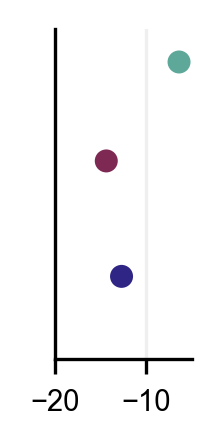

In [8]:
plt.figure(figsize=(0.75, 1.5))
ys = [18, 12, 5]
sns.scatterplot(data=ef_joined.set_index("model").loc[ORDER], y=ys, x="joined_ranking", hue="model")
plt.xlabel(None)
plt.legend().remove()
plt.grid(axis="x", alpha=0.2)
plt.xlim(-20, -5)
plt.ylim(0, 20)
plt.gca().yaxis.set_visible(False)
plt.savefig("../../figure-panels/Fig3b.jpg", bbox_inches="tight")
plt.show()

# Hallmark collection

In [9]:
order_hallmark = ["Random\nSamples", "Random Combos.\nof Samples"]
hallmark_to_show_indiv = pd.concat({
    "Random\nSamples":pd.read_csv(FILEPATHS["Hallmark_subsamples_indiv"]),
    "Random Combos.\nof Samples":pd.read_csv(FILEPATHS["Hallmark_combo_indiv"])
}).reset_index()
hallmark_to_show = pd.concat({
    "Random\nSamples":pd.read_csv(FILEPATHS['Hallmark_subsamples_scores']),
    "Random Combos.\nof Samples":pd.read_csv(FILEPATHS['Hallmark_combo_scores']),
}).reset_index()
hallmark_to_show.loc[lambda x: x["n"] == 0, "joined_ranking"] = np.nan

In [10]:
hallmark_pvals_indiv = ttest_on_metric(
    hallmark_to_show_indiv, "indiv_ranking", anchor="GeneTEA", alternative="greater", groups="level_0"
).loc[
    lambda x: ~x.index.get_level_values(2).isin(["GeneTEA-Grouped"])
]
hallmark_pvals_indiv

statistic        pvalue       df  \
Random\nSamples            GeneTEA Enrichr  50.188901  0.000000e+00  31421.0   
                                   g:GOSt   39.427579  0.000000e+00  25045.0   
Random Combos.\nof Samples GeneTEA Enrichr  13.076198  3.328107e-39  18819.0   
                                   g:GOSt   41.352712  0.000000e+00  17454.0   

                                            n anchor  n other         str  
Random\nSamples            GeneTEA Enrichr   11623.0  19800.0         p=0  
                                   g:GOSt    11623.0  13424.0         p=0  
Random Combos.\nof Samples GeneTEA Enrichr    8821.0  10000.0  p=3.33e-39  
                                   g:GOSt     8821.0   8635.0         p=0

In [11]:
hallmark_pvals = ttest_on_metric(hallmark_to_show, "joined_ranking", anchor="GeneTEA", alternative="greater", groups="level_0").loc[
    lambda x: ~x.index.get_level_values(2).isin(["GeneTEA-Grouped"])
]
hallmark_pvals

dropping 19 NAs


statistic        pvalue     df  \
Random\nSamples            GeneTEA Enrichr   5.014335  4.085905e-07  381.0   
                                   g:GOSt   10.285568  2.283572e-22  382.0   
Random Combos.\nof Samples GeneTEA Enrichr   0.118049  4.530746e-01  197.0   
                                   g:GOSt    5.144638  3.226743e-07  197.0   

                                            n anchor  n other         str  
Random\nSamples            GeneTEA Enrichr     185.0    198.0  p=4.09e-07  
                                   g:GOSt      185.0    199.0  p=2.28e-22  
Random Combos.\nof Samples GeneTEA Enrichr      99.0    100.0      p=0.45  
                                   g:GOSt       99.0    100.0  p=3.23e-07

In [12]:
no_enriched_hallmark = hallmark_to_show.groupby(["level_0", "model"])["n"].apply(lambda x: (x == 0).sum()).to_frame("no enriched").reset_index()
no_enriched_hallmark

,level_0,model,no enriched
0,Random\nSamples,Enrichr,2
1,Random\nSamples,GeneTEA,15
2,Random\nSamples,GeneTEA-Grouped,0
3,Random\nSamples,g:GOSt,1
4,Random Combos.\nof Samples,Enrichr,0
5,Random Combos.\nof Samples,GeneTEA,1
6,Random Combos.\nof Samples,GeneTEA-Grouped,0
7,Random Combos.\nof Samples,g:GOSt,0


# Experimentally derived queries

In [13]:
order_exp = [
    "AlphaFold2\nProtein\nClusters", "BioID\nInteracting\nProteins", "Human Disease\nGWAS with\nRare Variants", 
    "Perturb-seq\nExpression\nModules", "Perturb-seq\nPerturbation\nClusters", 
]
exp_to_show_indiv = pd.concat({
    "AlphaFold2\nProtein\nClusters":pd.read_csv(FILEPATHS['AlphaFold2_Protein_Clusters_indiv']),
    "BioID\nInteracting\nProteins":pd.read_csv(FILEPATHS['BioID_Interacting_Proteins_indiv']),
    "Human Disease\nGWAS with\nRare Variants":pd.read_csv(FILEPATHS['Rare_Variant_GWAS_indiv']),
    "Perturb-seq\nExpression\nModules":pd.read_csv(FILEPATHS['Perturb-seq_Expression_Modules_indiv']),
    "Perturb-seq\nPerturbation\nClusters":pd.read_csv(FILEPATHS['Perturb-seq_Perturbation_Clusters_indiv']),
}).reset_index()
exp_to_show = pd.concat({
    "AlphaFold2\nProtein\nClusters":pd.read_csv(FILEPATHS['AlphaFold2_Protein_Clusters_scores']),
    "BioID\nInteracting\nProteins":pd.read_csv(FILEPATHS['BioID_Interacting_Proteins_scores']),
    "Human Disease\nGWAS with\nRare Variants":pd.read_csv(FILEPATHS['Rare_Variant_GWAS_scores']),
    "Perturb-seq\nExpression\nModules":pd.read_csv(FILEPATHS['Perturb-seq_Expression_Modules_scores']),
    "Perturb-seq\nPerturbation\nClusters":pd.read_csv(FILEPATHS['Perturb-seq_Perturbation_Clusters_scores']),
}).reset_index()
exp_to_show.loc[lambda x: x["n"] == 0, "joined_ranking"] = np.nan

In [14]:
exp_counts = exp_to_show.drop_duplicates(subset=["level_0", "gene_set"]).value_counts("level_0").loc[order_exp]
exp_counts, exp_counts.sum()

(level_0
 AlphaFold2\nProtein\nClusters              188
 BioID\nInteracting\nProteins               152
 Human Disease\nGWAS with\nRare Variants     90
 Perturb-seq\nExpression\nModules            38
 Perturb-seq\nPerturbation\nClusters         64
 dtype: int64,
 532)

In [15]:
exp_pvals_indiv = ttest_on_metric(
    exp_to_show_indiv, "indiv_ranking", anchor="GeneTEA", alternative="greater", groups="level_0"
).loc[
    lambda x: ~x.index.get_level_values(2).isin(["GeneTEA-Grouped"])
]
exp_pvals_indiv

statistic  \
AlphaFold2\nProtein\nClusters           GeneTEA Enrichr  53.145933   
                                                g:GOSt   11.572696   
BioID\nInteracting\nProteins            GeneTEA Enrichr  59.364506   
                                                g:GOSt   32.037651   
Human Disease\nGWAS with\nRare Variants GeneTEA Enrichr  38.465628   
                                                g:GOSt   23.362616   
Perturb-seq\nExpression\nModules        GeneTEA Enrichr  16.355119   
                                                g:GOSt   17.716388   
Perturb-seq\nPerturbation\nClusters     GeneTEA Enrichr  35.777989   
                                                g:GOSt   15.414900   

                                                                pvalue  \
AlphaFold2\nProtein\nClusters           GeneTEA Enrichr   0.000000e+00   
                                                g:GOSt    3.955465e-31   
BioID\nInteracting\nProteins            GeneTEA Enrichr   0.000000e+00   
                                                g:GOSt   6.529113e-219   
Human Disease\nGWAS with\nRare Variants GeneTEA Enrichr  4.379808e-304   
                                                g:GOSt   3.604146e-116   
Perturb-seq\nExpression\nModules        GeneTEA Enrichr   5.078651e-59   
                                                g:GOSt    3.918634e-68   
Perturb-seq\nPerturbation\nClusters     GeneTEA Enrichr  3.633987e-261   
                                                g:GOSt    8.201089e-53   

                                                              df  n anchor  \
AlphaFold2\nProtein\nClusters           GeneTEA Enrichr  22316.0    5670.0   
                                                g:GOSt   13556.0    5670.0   
BioID\nInteracting\nProteins            GeneTEA Enrichr  22278.0    7359.0   
                                                g:GOSt   16678.0    7359.0   
Human Disease\nGWAS with\nRare Variants GeneTEA Enrichr  10974.0    2167.0   
                                                g:GOSt    6337.0    2167.0   
Perturb-seq\nExpression\nModules        GeneTEA Enrichr   5394.0    1717.0   
                                                g:GOSt    4281.0    1717.0   
Perturb-seq\nPerturbation\nClusters     GeneTEA Enrichr   8306.0    2295.0   
                                                g:GOSt    5457.0    2295.0   

                                                         n other          str  
AlphaFold2\nProtein\nClusters           GeneTEA Enrichr  16648.0          p=0  
                                                g:GOSt    7888.0   p=3.96e-31  
BioID\nInteracting\nProteins            GeneTEA Enrichr  14921.0          p=0  
                                                g:GOSt    9321.0  p=6.53e-219  
Human Disease\nGWAS with\nRare Variants GeneTEA Enrichr   8809.0  p=4.38e-304  
                                                g:GOSt    4172.0  p=3.60e-116  
Perturb-seq\nExpression\nModules        GeneTEA Enrichr   3679.0   p=5.08e-59  
                                                g:GOSt    2566.0   p=3.92e-68  
Perturb-seq\nPerturbation\nClusters     GeneTEA Enrichr   6013.0  p=3.63e-261  
                                                g:GOSt    3164.0   p=8.20e-53

In [16]:
exp_pvals = ttest_on_metric(exp_to_show, "joined_ranking", anchor="GeneTEA", alternative="greater", groups="level_0").loc[
    lambda x: ~x.index.get_level_values(2).isin(["GeneTEA-Grouped"])
]
exp_pvals

dropping 91 NAs


statistic  \
AlphaFold2\nProtein\nClusters           GeneTEA Enrichr  11.722428   
                                                g:GOSt   12.615367   
BioID\nInteracting\nProteins            GeneTEA Enrichr  12.082262   
                                                g:GOSt   15.532043   
Human Disease\nGWAS with\nRare Variants GeneTEA Enrichr   6.358885   
                                                g:GOSt   10.968112   
Perturb-seq\nExpression\nModules        GeneTEA Enrichr   1.892289   
                                                g:GOSt    5.669192   
Perturb-seq\nPerturbation\nClusters     GeneTEA Enrichr   7.039504   
                                                g:GOSt    7.569892   

                                                               pvalue     df  \
AlphaFold2\nProtein\nClusters           GeneTEA Enrichr  2.265060e-27  357.0   
                                                g:GOSt   1.162525e-30  352.0   
BioID\nInteracting\nProteins            GeneTEA Enrichr  9.146318e-28  288.0   
                                                g:GOSt   3.305654e-40  287.0   
Human Disease\nGWAS with\nRare Variants GeneTEA Enrichr  1.029926e-09  159.0   
                                                g:GOSt   3.183408e-21  150.0   
Perturb-seq\nExpression\nModules        GeneTEA Enrichr  3.129426e-02   70.0   
                                                g:GOSt   1.437797e-07   71.0   
Perturb-seq\nPerturbation\nClusters     GeneTEA Enrichr  7.058284e-11  117.0   
                                                g:GOSt   5.906909e-12  111.0   

                                                         n anchor  n other  \
AlphaFold2\nProtein\nClusters           GeneTEA Enrichr     175.0    184.0   
                                                g:GOSt      175.0    179.0   
BioID\nInteracting\nProteins            GeneTEA Enrichr     139.0    151.0   
                                                g:GOSt      139.0    150.0   
Human Disease\nGWAS with\nRare Variants GeneTEA Enrichr      72.0     89.0   
                                                g:GOSt       72.0     80.0   
Perturb-seq\nExpression\nModules        GeneTEA Enrichr      35.0     37.0   
                                                g:GOSt       35.0     38.0   
Perturb-seq\nPerturbation\nClusters     GeneTEA Enrichr      56.0     63.0   
                                                g:GOSt       56.0     57.0   

                                                                str  
AlphaFold2\nProtein\nClusters           GeneTEA Enrichr  p=2.27e-27  
                                                g:GOSt   p=1.16e-30  
BioID\nInteracting\nProteins            GeneTEA Enrichr  p=9.15e-28  
                                                g:GOSt   p=3.31e-40  
Human Disease\nGWAS with\nRare Variants GeneTEA Enrichr  p=1.03e-09  
                                                g:GOSt   p=3.18e-21  
Perturb-seq\nExpression\nModules        GeneTEA Enrichr      p=0.03  
                                                g:GOSt   p=1.44e-07  
Perturb-seq\nPerturbation\nClusters     GeneTEA Enrichr  p=7.06e-11  
                                                g:GOSt   p=5.91e-12

### Find rank of best terms in each query

In [17]:
rank_of_best = exp_to_show_indiv.groupby(["level_0", "gene_set", "model"]).apply(
    lambda x: None if x["indiv_ranking"].isnull().all() 
    else x.loc[x["indiv_ranking"].idxmax(), ["indiv_ranking", "rank"]]
)
rank_pval = ttest_on_metric(rank_of_best, "rank", alternative="less").loc[
    lambda x: ~x.index.get_level_values(1).isin(["GeneTEA-Grouped"])
]
rank_pval

statistic        pvalue     df  n anchor  n other         str
GeneTEA Enrichr -13.560312  7.105645e-39  999.0     477.0    524.0  p=7.11e-39
        g:GOSt   -5.144165  1.622763e-07  979.0     477.0    504.0  p=1.62e-07

### Find number queries with no enriched terms

In [18]:
no_enriched = exp_to_show.groupby(["level_0", "model"])["n"].apply(lambda x: (x == 0).sum()).to_frame("no enriched").reset_index()
no_enriched

,level_0,model,no enriched
0,AlphaFold2\nProtein\nClusters,Enrichr,4
1,AlphaFold2\nProtein\nClusters,GeneTEA,13
2,AlphaFold2\nProtein\nClusters,GeneTEA-Grouped,0
3,AlphaFold2\nProtein\nClusters,g:GOSt,9
4,BioID\nInteracting\nProteins,Enrichr,1
5,BioID\nInteracting\nProteins,GeneTEA,13
6,BioID\nInteracting\nProteins,GeneTEA-Grouped,0
7,BioID\nInteracting\nProteins,g:GOSt,2
8,Human Disease\nGWAS with\nRare Variants,Enrichr,1
9,Human Disease\nGWAS with\nRare Variants,GeneTEA,18


### Porportion of queries with >10 high redundancy pairs

In [19]:
exp_to_show.groupby("model")["num_high_redundancy"].apply(lambda x: (x > 10).sum() / x.notnull().sum()).loc[ORDER_W_GROUPED]

model
GeneTEA            0.656455
GeneTEA-Grouped    0.363239
g:GOSt             0.773931
Enrichr            0.931298
Name: num_high_redundancy, dtype: float64

# Assemble Supp. Fig 1c-d

/opt/anaconda3/envs/genetea-test/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


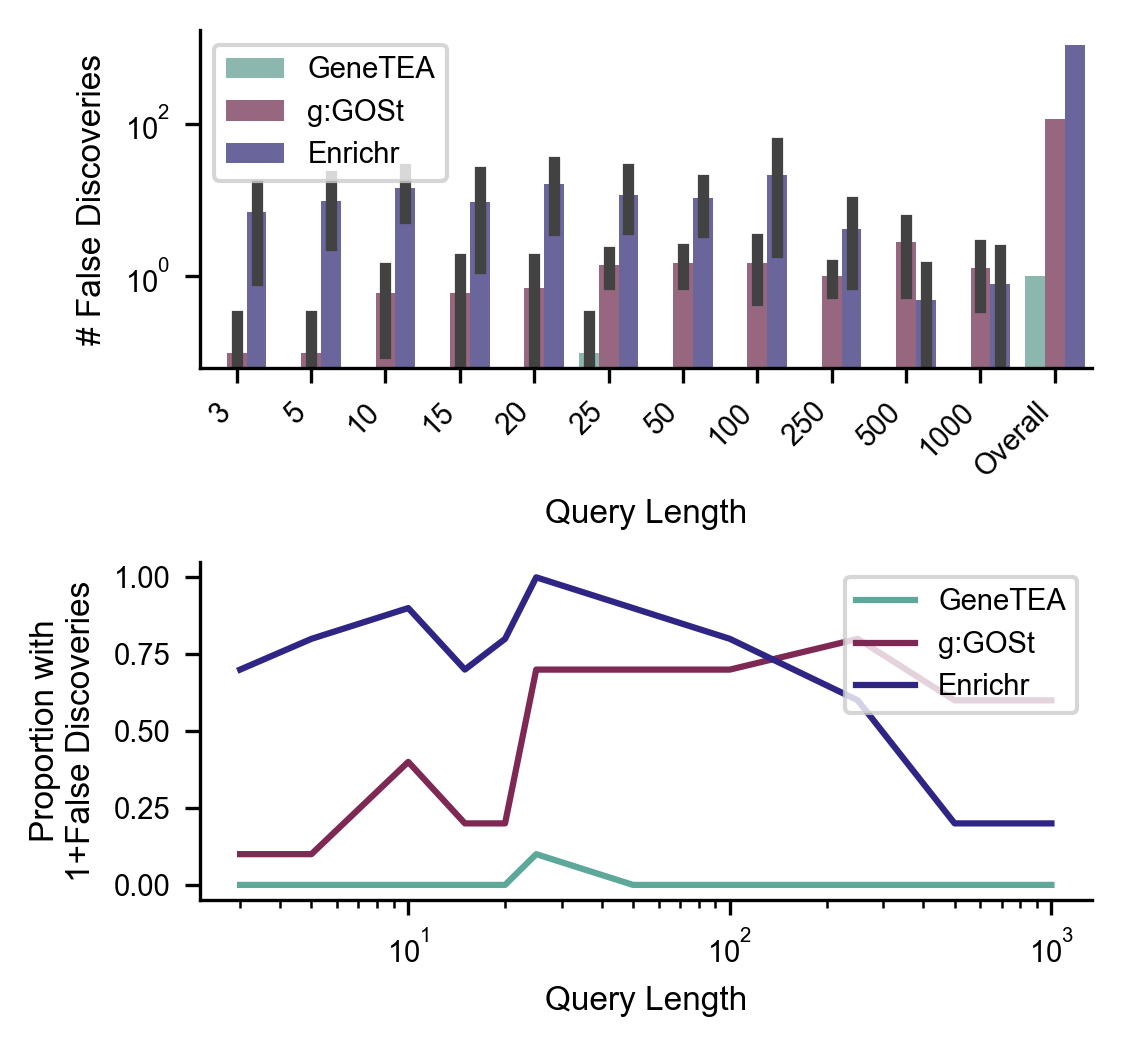

In [20]:
fig, axs = plt.subplots(2, 1, figsize=(3.75,3.5), sharex=False, sharey=False, dpi=300)

sns.barplot(
    data=pd.concat([false_discovery, num_fd]), hue="model", y="false_discoveries", x="len_query",
    hue_order=ORDER, palette=PALETTE[:3], ax=axs[0], alpha=0.75
)
axs[0].set_yscale("log")
axs[0].set_ylabel("# False Discoveries")
axs[0].set_xlabel("Query Length")
axs[0].legend(loc="upper left")
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha="right")

sns.lineplot(
    data=prop_fd_len, hue="model", y="Proportion", x="len_query", 
    hue_order=ORDER, palette=PALETTE[:3], ax=axs[1]
)
axs[1].set_xscale("log")
axs[1].set_ylabel("Proportion with\n1+False Discoveries")
axs[1].set_xlabel("Query Length")
axs[1].legend(loc="upper right")

plt.savefig("../../figure-panels/SuppFig1_right.jpg")
plt.show()

# Assemble Supp. Fig 2

/var/folders/8g/bm84gl3102v3fy4htn8rpv340000gp/T/ipykernel_71048/3821789018.py:129: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("../../figure-panels/SuppFig2.jpg", bbox_inches="tight")
/opt/anaconda3/envs/genetea-test/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


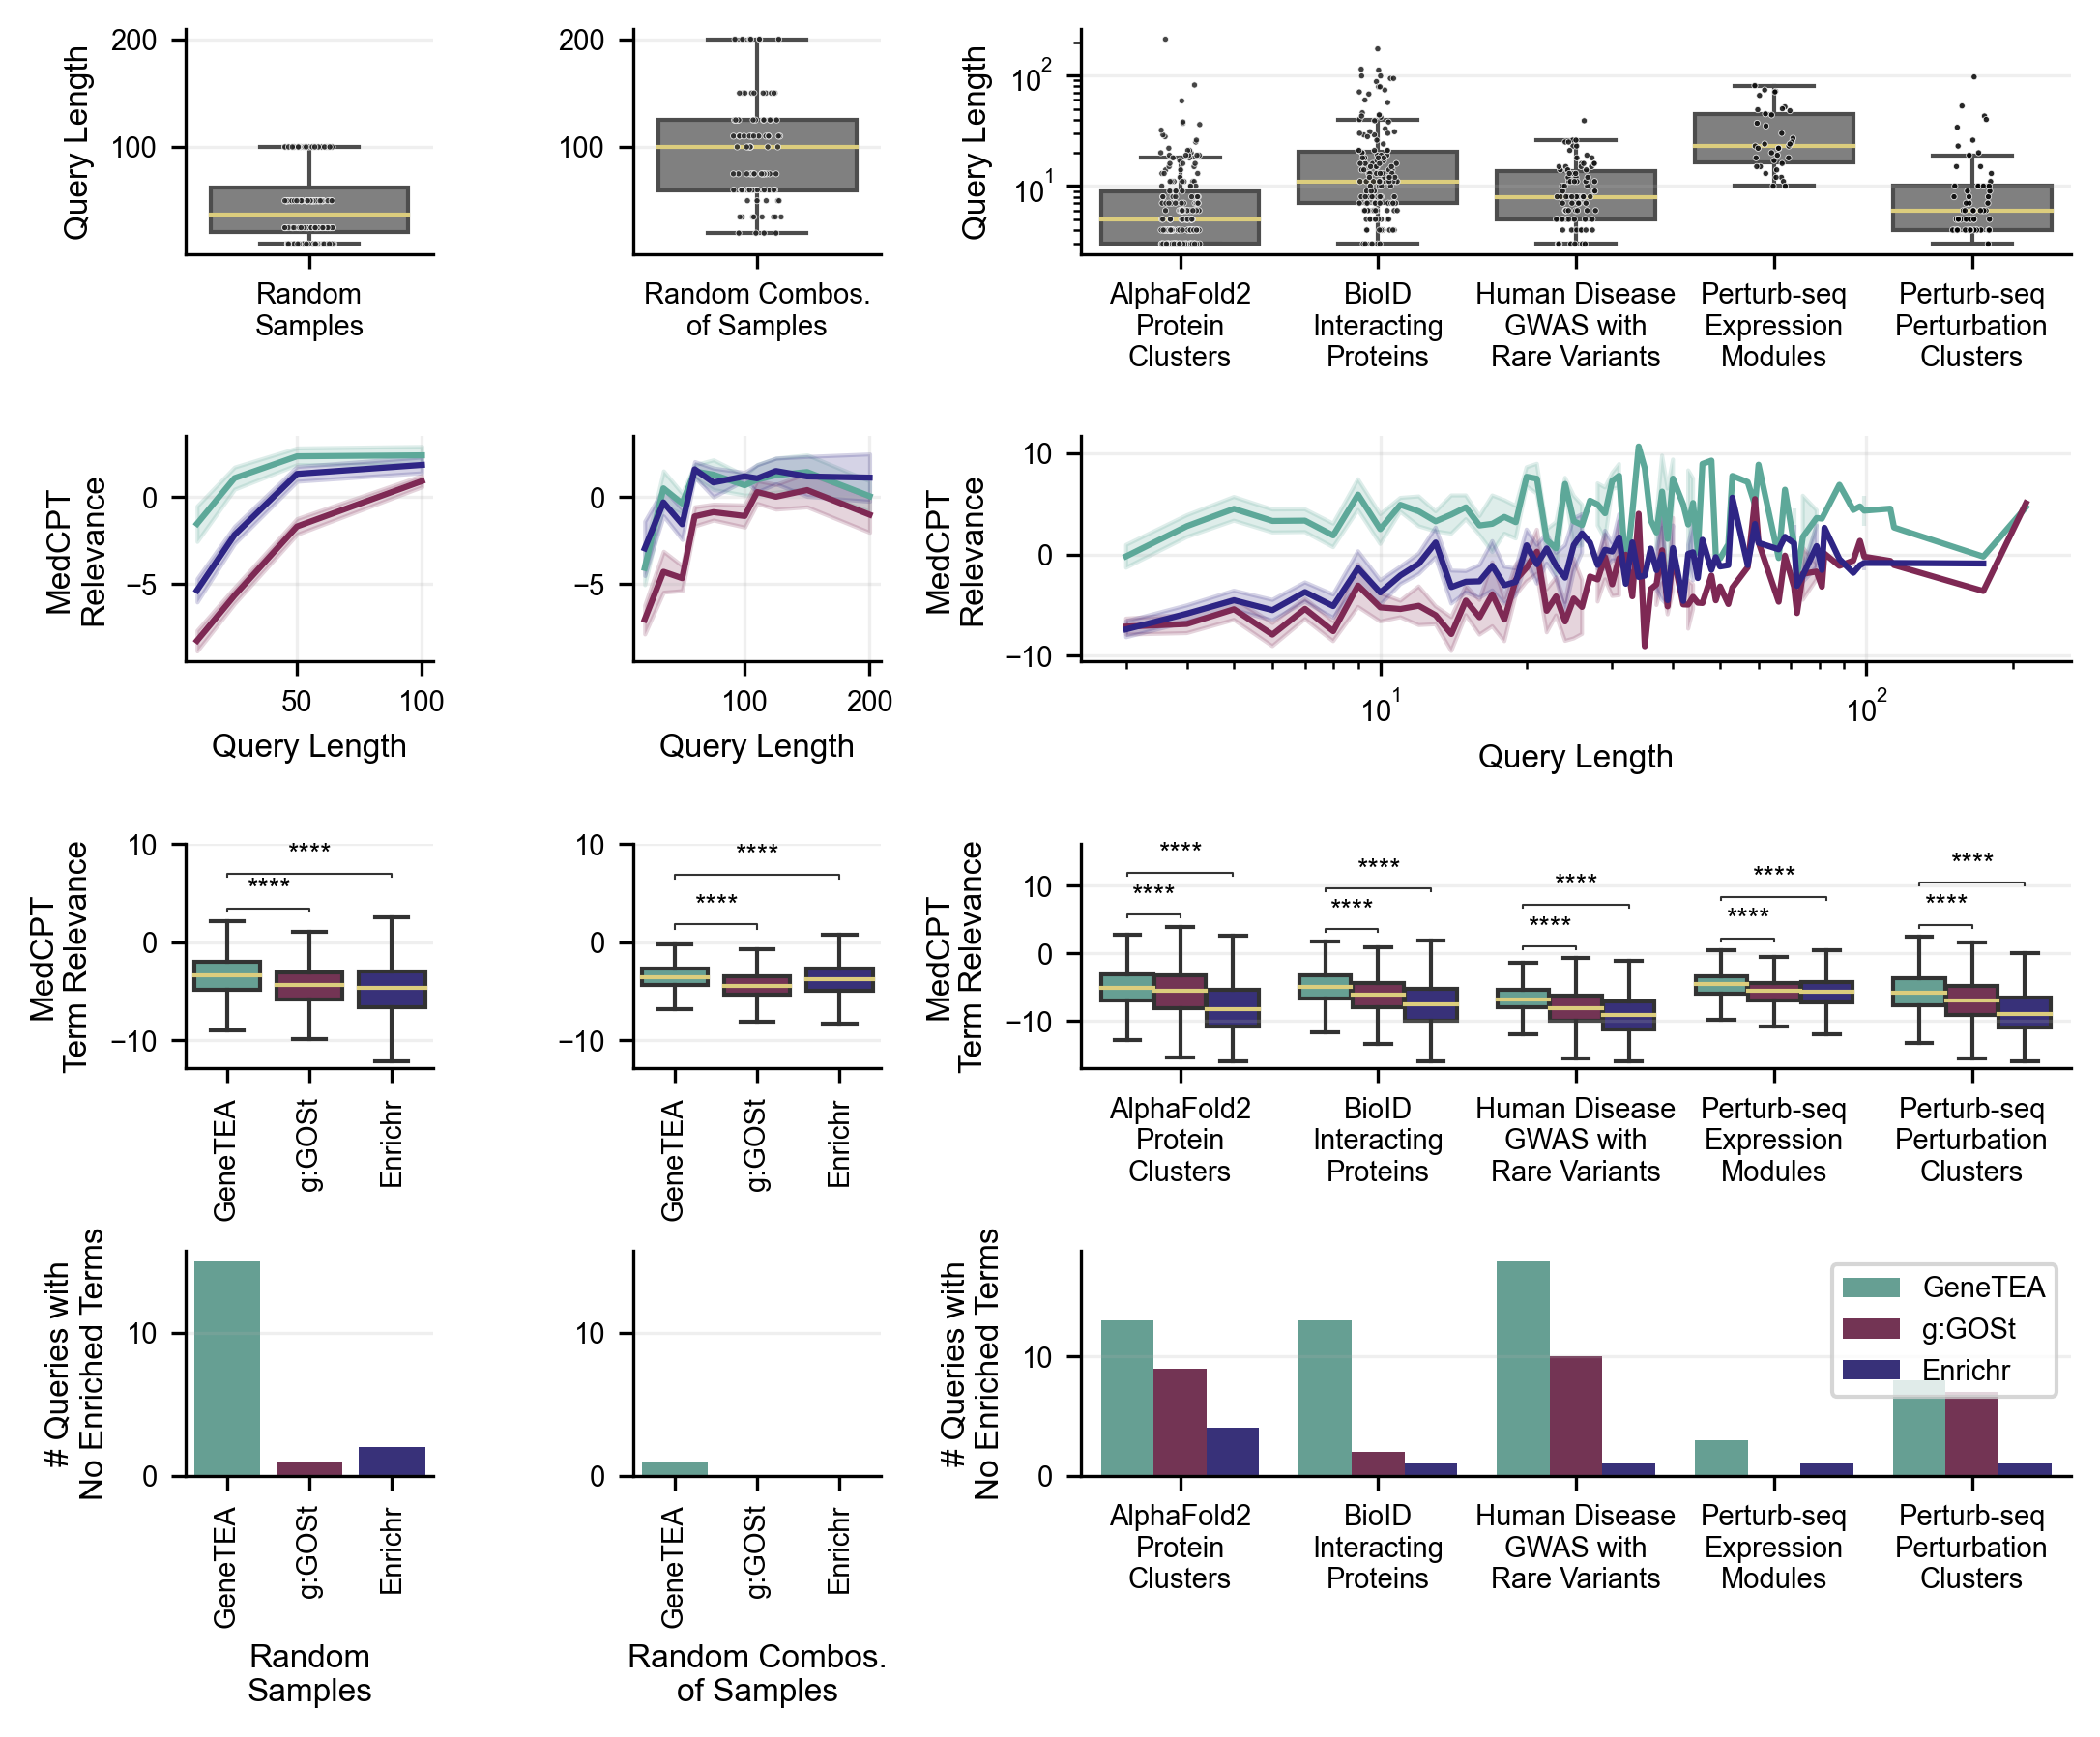

In [21]:
fig, axs = plt.subplots(4, 3, figsize=(7.25,6), sharex=False, sharey=False, width_ratios=[1,1,4], dpi=300, layout="constrained")

distplot(
    data=hallmark_to_show.query("level_0 == 'Random\\nSamples'").drop_duplicates(subset=["level_0", "gene_set"]), 
    x="level_0", y="len_query", hue="level_0", s=1.5, palette=["grey"], ax=axs[0, 0], 
    hue_order=["Random\nSamples"], order=None, dodge=False
)
axs[0, 0].legend(loc="upper left").remove()
axs[0, 0].grid(axis="y", alpha=0.2)
axs[0, 0].set_ylabel("Query Length")
axs[0, 0].set_xlabel(None)

axs[0,1].sharey(axs[0,0])
distplot(
    data=hallmark_to_show.query("level_0 == 'Random Combos.\\nof Samples'").drop_duplicates(subset=["level_0", "gene_set"]), 
    x="level_0", y="len_query", hue="level_0", s=1.5, palette=["grey"], ax=axs[0, 1], 
    hue_order=["Random Combos.\nof Samples"], order=None, dodge=False
)
axs[0, 1].legend(loc="upper left").remove()
axs[0, 1].grid(axis="y", alpha=0.2)
axs[0, 1].set_ylabel(None)
axs[0, 1].set_xlabel(None)

sns.lineplot(
    data=hallmark_to_show.query("level_0 == 'Random\\nSamples'"), errorbar="se",
    x="len_query", y="joined_ranking", hue="model", hue_order=ORDER, ax=axs[1, 0]
)
axs[1, 0].legend().remove()
axs[1, 0].set_ylabel("MedCPT\nRelevance")
axs[1, 0].set_xlabel("Query Length")
axs[1, 0].grid(axis="both", alpha=0.2)

axs[1, 1].sharey(axs[1, 0])
sns.lineplot(
    data=hallmark_to_show.query("level_0 == 'Random Combos.\\nof Samples'"), errorbar="se",
    x="len_query", y="joined_ranking", hue="model", hue_order=ORDER, ax=axs[1, 1]
)
axs[1, 1].legend().remove()
axs[1, 1].set_ylabel(None)
axs[1, 1].set_xlabel("Query Length")
axs[1, 1].grid(axis="both", alpha=0.2)

distplot(
    data=hallmark_to_show_indiv.query("level_0 == 'Random\\nSamples'"), 
    x="model", y="indiv_ranking", hue="model", strip=False,
    order=ORDER, hue_order=ORDER, dodge=False, stats=hallmark_pvals_indiv.loc["Random\nSamples"], annot_format="star", 
    ax=axs[2, 0]
)
axs[2, 0].legend(loc="upper left").remove()
axs[2, 0].grid(axis="y", alpha=0.2)
axs[2, 0].set_xlabel(None)
axs[2, 0].set_ylabel("MedCPT\nTerm Relevance")
axs[2, 0].set_xticklabels(ORDER, rotation=90)

axs[2,1].sharey(axs[2,0])
distplot(
    data=hallmark_to_show_indiv.query("level_0 == 'Random Combos.\\nof Samples'"), 
    x="model", y="indiv_ranking", hue="model", strip=False,
    order=ORDER, hue_order=ORDER, dodge=False, stats=hallmark_pvals_indiv.loc["Random Combos.\nof Samples"], annot_format="star", 
    ax=axs[2, 1]
)
axs[2, 1].legend(loc="upper left").remove()
axs[2, 1].grid(axis="y", alpha=0.2)
axs[2, 1].set_xlabel(None)
axs[2, 1].set_ylabel(None)
axs[2, 1].set_xticklabels(ORDER, rotation=90)

# axs[3,0].sharex(axs[2,0])
sns.barplot(
    data=no_enriched_hallmark.query("level_0 == 'Random\\nSamples'"), dodge=False,
    x="model", y="no enriched", hue="model", hue_order=ORDER, order=ORDER, ax=axs[3, 0]
)
axs[3, 0].legend(loc="upper right").remove()
axs[3, 0].grid(axis="y", alpha=0.2)
axs[3, 0].set_xlabel("Random\nSamples")
axs[3, 0].set_ylabel("# Queries with\nNo Enriched Terms")
axs[3, 0].set_xticklabels(ORDER, rotation=90)

axs[3,1].sharey(axs[3,0])
sns.barplot(
    data=no_enriched_hallmark.query("level_0 == 'Random Combos.\\nof Samples'"),  dodge=False,
    x="model", y="no enriched", hue="model", hue_order=ORDER, order=ORDER, ax=axs[3, 1]
)
axs[3, 1].legend(loc="upper right").remove()
axs[3, 1].grid(axis="y", alpha=0.2)
axs[3, 1].set_xlabel("Random Combos.\nof Samples")
axs[3, 1].set_ylabel(None)
axs[3, 1].set_xticklabels(ORDER, rotation=90)

distplot(
    data=exp_to_show.drop_duplicates(subset=["level_0", "gene_set"]), 
    x="level_0", y="len_query", hue="level_0", s=1.5, 
    order=order_exp, dodge=False, hue_order=order_exp, palette=["grey"], ax=axs[0, 2]
)
axs[0, 2].legend(loc="upper left").remove()
axs[0, 2].grid(axis="y", alpha=0.2)
axs[0, 2].set_yscale("log")
axs[0, 2].set_ylabel("Query Length")
axs[0, 2].set_xlabel(None)

sns.lineplot(
    data=exp_to_show, x="len_query", y="joined_ranking", hue="model", 
    errorbar="se", hue_order=ORDER, ax=axs[1, 2]
)
axs[1, 2].legend().remove()
axs[1, 2].set_ylabel("MedCPT\nRelevance")
axs[1, 2].set_xlabel("Query Length")
axs[1, 2].set_xscale("log")
axs[1, 2].grid(axis="both", alpha=0.2)


axs[3,2].sharex(axs[2,2])
distplot(
    data=exp_to_show_indiv, x="level_0", y="indiv_ranking", hue="model", strip=False,
    order=order_exp, hue_order=ORDER, dodge=True, stats=exp_pvals_indiv, annot_format="star", 
    ax=axs[2, 2]
)
axs[2, 2].legend(loc="upper left").remove()
axs[2, 2].grid(axis="y", alpha=0.2)
axs[2, 2].set_xlabel(None)
axs[2, 2].set_ylabel("MedCPT\nTerm Relevance")

sns.barplot(data=no_enriched, x="level_0", y="no enriched", hue="model", hue_order=ORDER, order=order_exp, ax=axs[3, 2])
axs[3, 2].legend(loc="upper right")
axs[3, 2].grid(axis="y", alpha=0.2)
axs[3, 2].set_xlabel(None)
axs[3, 2].set_ylabel("# Queries with\nNo Enriched Terms")

plt.savefig("../../figure-panels/SuppFig2.jpg", bbox_inches="tight")
plt.show()

# Assemble Fig 3 Upper Panels

/var/folders/8g/bm84gl3102v3fy4htn8rpv340000gp/T/ipykernel_71048/602962392.py:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("../../figure-panels/Fig3_upper.jpg", bbox_inches="tight")
/opt/anaconda3/envs/genetea-test/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


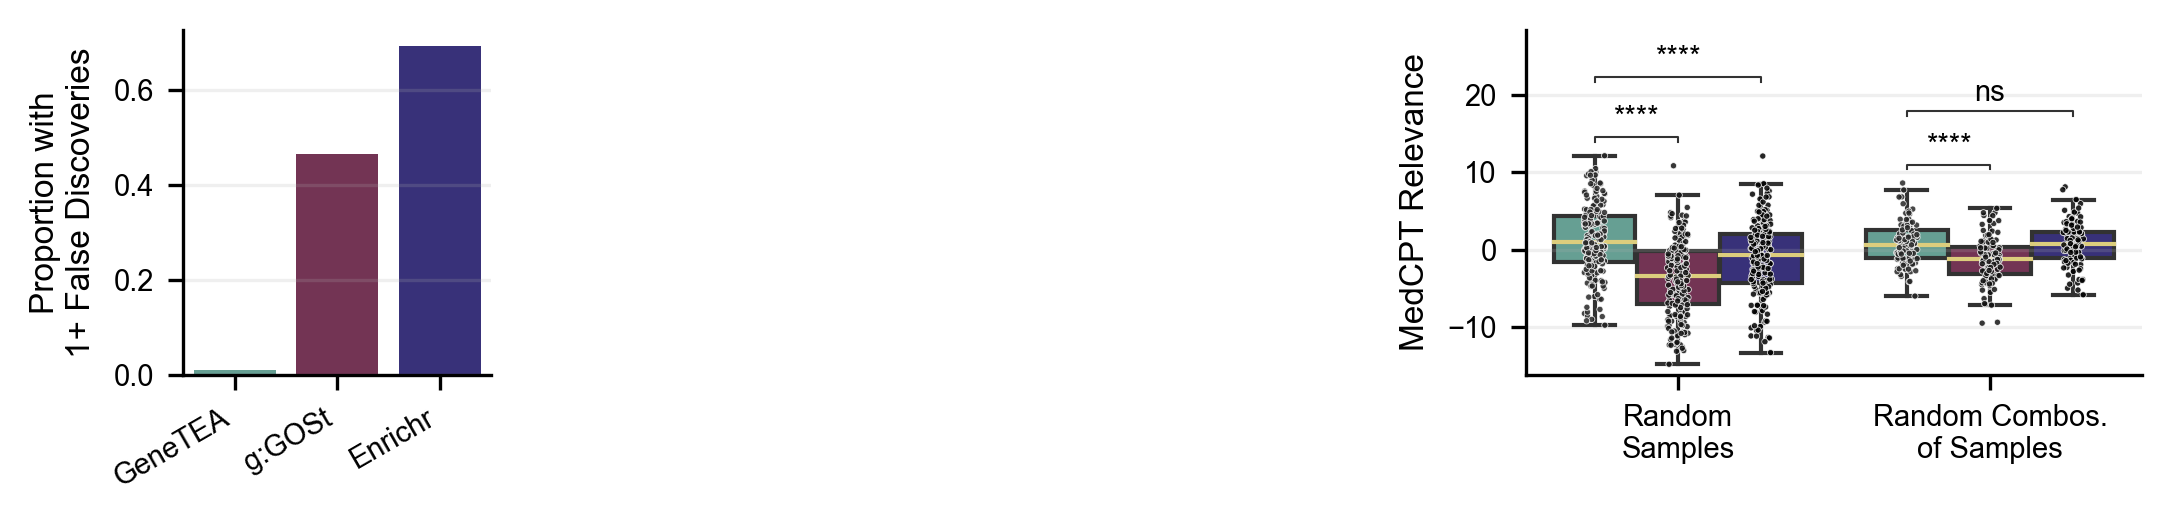

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(7.25,1.75), width_ratios=(1.5,3.5, 3))

sns.barplot(
    data=prop_fd, x="model", y="Proportion", order=ORDER, ax=axs[0]
)
axs[0].grid(axis="y", alpha=0.2)
axs[0].set_ylabel("Proportion with\n1+ False Discoveries")
axs[0].set_xlabel(None)
axs[0].set_xticklabels(ORDER, rotation=30, ha="right")

axs[1].set_axis_off()

distplot(
    data=hallmark_to_show, x="level_0", y="joined_ranking", hue="model", s=1.5,
    order=order_hallmark, dodge=True, stats=hallmark_pvals, annot_format="star", hue_order=ORDER, ax=axs[2]
)
axs[2].legend(loc="upper center", ncols=3).remove()
axs[2].grid(axis="y", alpha=0.2)
axs[2].set_ylabel("MedCPT Relevance")
axs[2].set_xlabel(None)

plt.savefig("../../figure-panels/Fig3_upper.jpg", bbox_inches="tight")
plt.show()

# Assemble Fig 3 Lower Panels

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/8g/bm84gl3102v3fy4htn8rpv340000gp/T/ipykernel_71048/4195183959.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("../../figure-panels/Fig3_lower.jpg", bbox_inches="tight")
/opt/anaconda3/envs/genetea-test/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


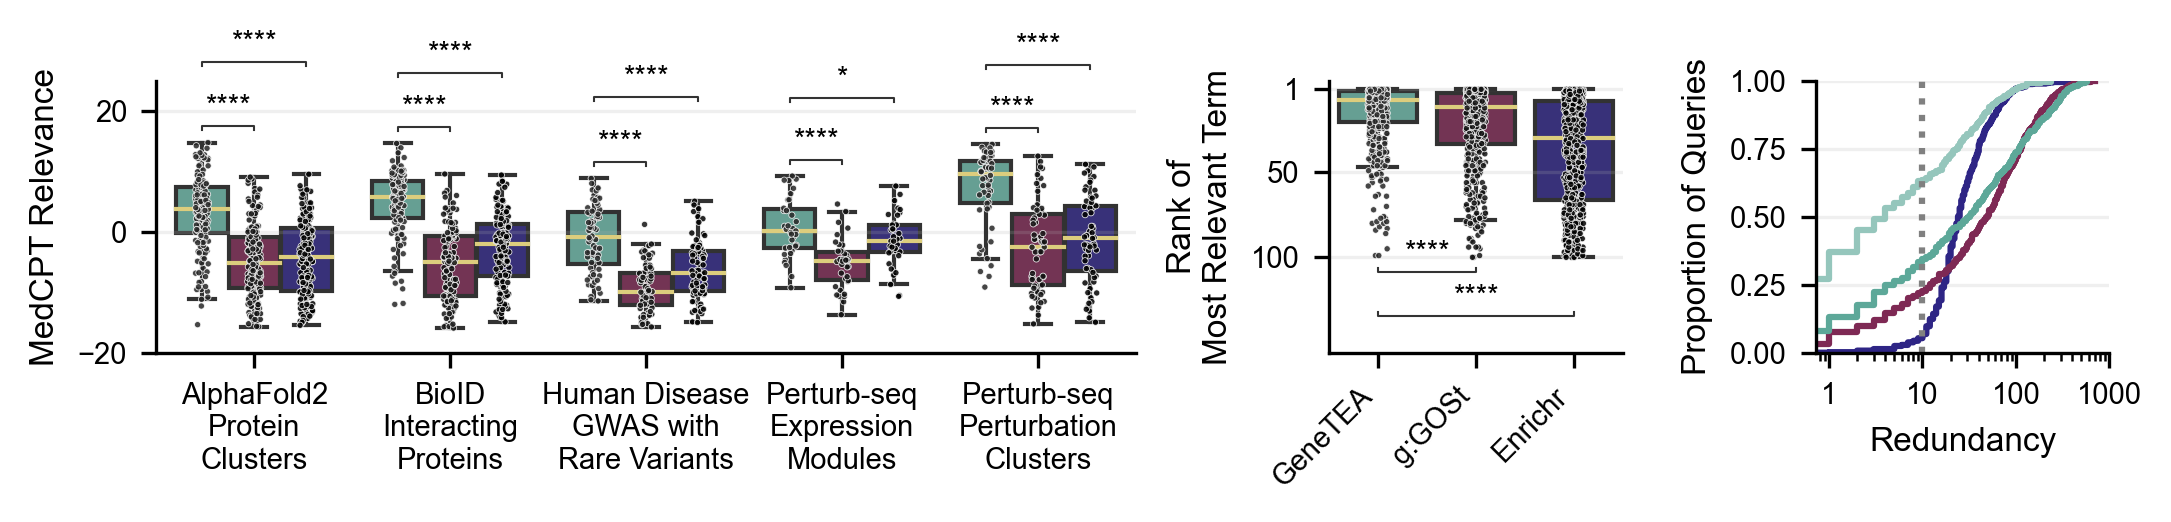

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(7.25,1.75), width_ratios=(5, 1.5, 1.5))

distplot(
    data=exp_to_show, x="level_0", y="joined_ranking", hue="model", s=1.5,
    order=order_exp, dodge=True, stats=exp_pvals, annot_format="star", 
    hue_order=ORDER, ax=axs[0]
)
axs[0].legend().remove()
axs[0].set_ylim(-20, 25)
axs[0].set_xlabel(None)
axs[0].grid(axis="y", alpha=0.2)
axs[0].set_ylabel("MedCPT Relevance")

distplot(
    data=rank_of_best.reset_index(), x="model", y="rank", hue="model", 
    order=ORDER, hue_order=ORDER, s=1.5, stats=rank_pval, annot_format="star", 
    ax=axs[1]
)
axs[1].legend().remove()
axs[1].invert_yaxis()
axs[1].set_yticks([1, 50, 100])
axs[1].set_xticks(range(len(ORDER)))
axs[1].set_xticklabels(ORDER, rotation=45, ha="right")
axs[1].set_xlabel(None)
axs[1].set_ylabel("Rank of\nMost Relevant Term")
axs[1].grid(axis="y", alpha=0.2)

sns.ecdfplot(
    data=exp_to_show, x="num_high_redundancy", hue="model", 
    hue_order=ORDER_W_GROUPED, palette=PALETTE_W_GROUPED[:4], ax=axs[2]
)
axs[2].set_ylabel("Proportion of Queries")
axs[2].set_xlabel("Redundancy")
axs[2].set_xscale("log")
axs[2].set_xticks([1, 10, 100, 1000], [1, 10, 100, 1000])
axs[2].legend().remove()
axs[2].axvline(10, color="grey", linestyle=":")
axs[2].grid(axis="y", alpha=0.2)

plt.savefig("../../figure-panels/Fig3_lower.jpg", bbox_inches="tight")
plt.show()

# Examples in Figure 4

In [24]:
exs = exp_to_show.groupby(["level_0", "gene_set"])["query"].first().loc[[
    ("AlphaFold2\nProtein\nClusters", "A0A151P4P9"),
    ("Perturb-seq\nPerturbation\nClusters", "histone/nucleosome synthesis")
]].str.split(", ")
exs

level_0                              gene_set                    
AlphaFold2\nProtein\nClusters        A0A151P4P9                                                                   [FCRL2, KIR3DS1, LILRA6, LILRB3]
Perturb-seq\nPerturbation\nClusters  histone/nucleosome synthesis    [ARHGAP6, ARPC1B, CASP8AP2, CHAF1A, CHAF1B, FOLR3, HINFP, LSM10, LSM11, SLBP]
Name: query, dtype: object

/var/folders/8g/bm84gl3102v3fy4htn8rpv340000gp/T/ipykernel_71048/1949474628.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("../../figure-panels/Fig4_left.jpg", bbox_inches="tight")
/opt/anaconda3/envs/genetea-test/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


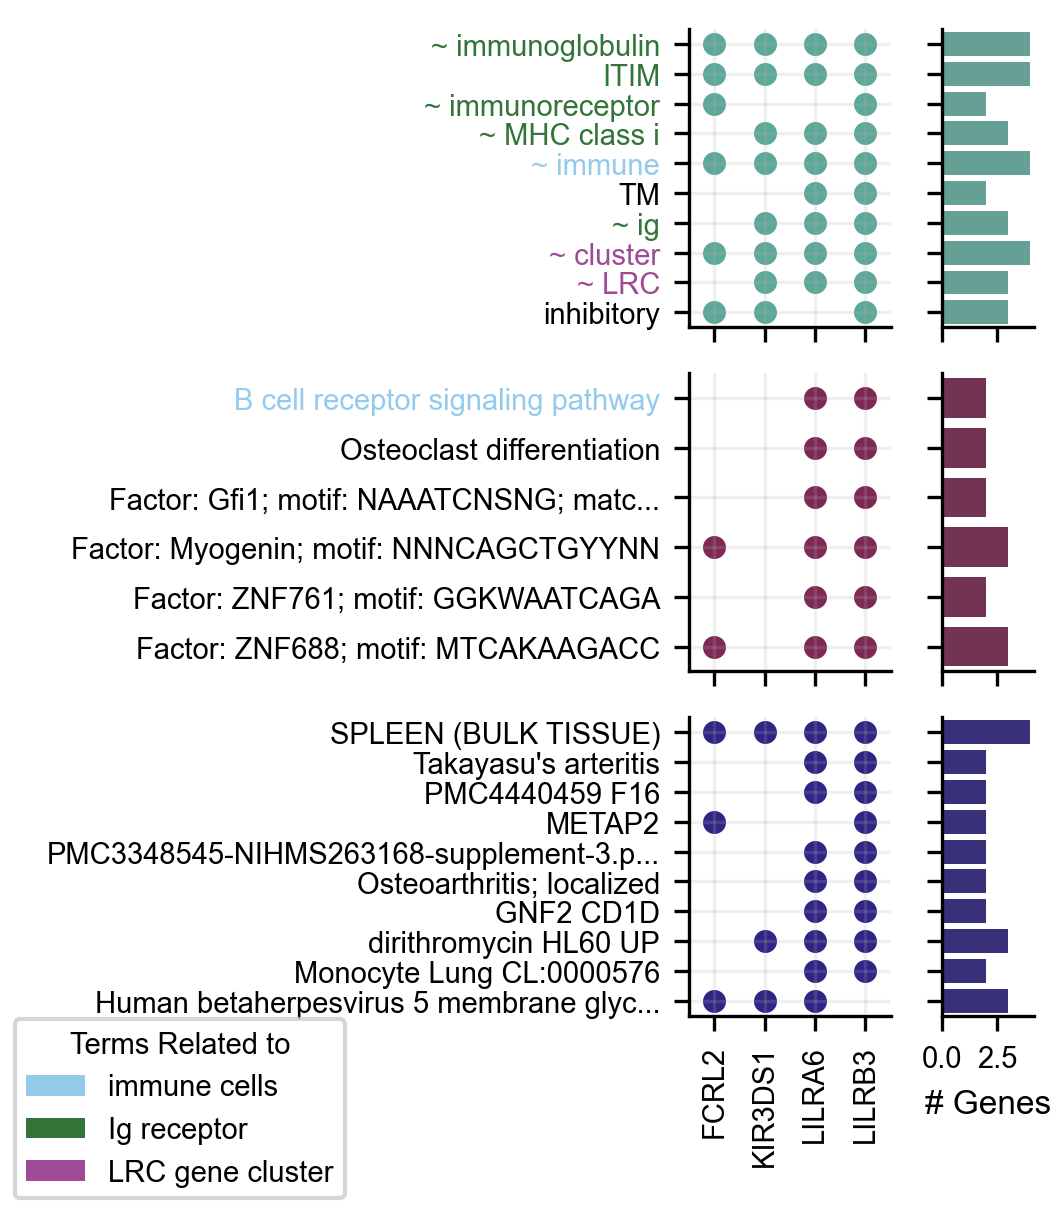

In [25]:
# ggost_map = pd.read_csv(FILEPATHS["ggost_ex1"])
# ggost_map = ggost_map.set_index("term_name")["intersections"].str.replace(",", " ")

plot_examples(
    exs[("AlphaFold2\nProtein\nClusters", "A0A151P4P9")],
    tea, comps,
    path=FILEPATHS["Fig4_left"],
    to_color={
        "immune cells":("B cell|leuko|immune|granulo",PALETTE[4]),
        "Ig receptor":("immunoglobulin|ITIM|MHC|(?:~ ig)|immunoreceptor", PALETTE[7]), 
        "LRC gene cluster":("LRC|cluster|19q13",PALETTE[6])
    }, width_ratios=(2.2,1), figsize=(3.5,4),
    # gene_map={"g:GOSt":ggost_map},
)
plt.savefig("../../figure-panels/Fig4_left.jpg", bbox_inches="tight")
plt.show()

/var/folders/8g/bm84gl3102v3fy4htn8rpv340000gp/T/ipykernel_71048/3943745135.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("../../figure-panels/Fig4_right.jpg", bbox_inches="tight")
/opt/anaconda3/envs/genetea-test/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


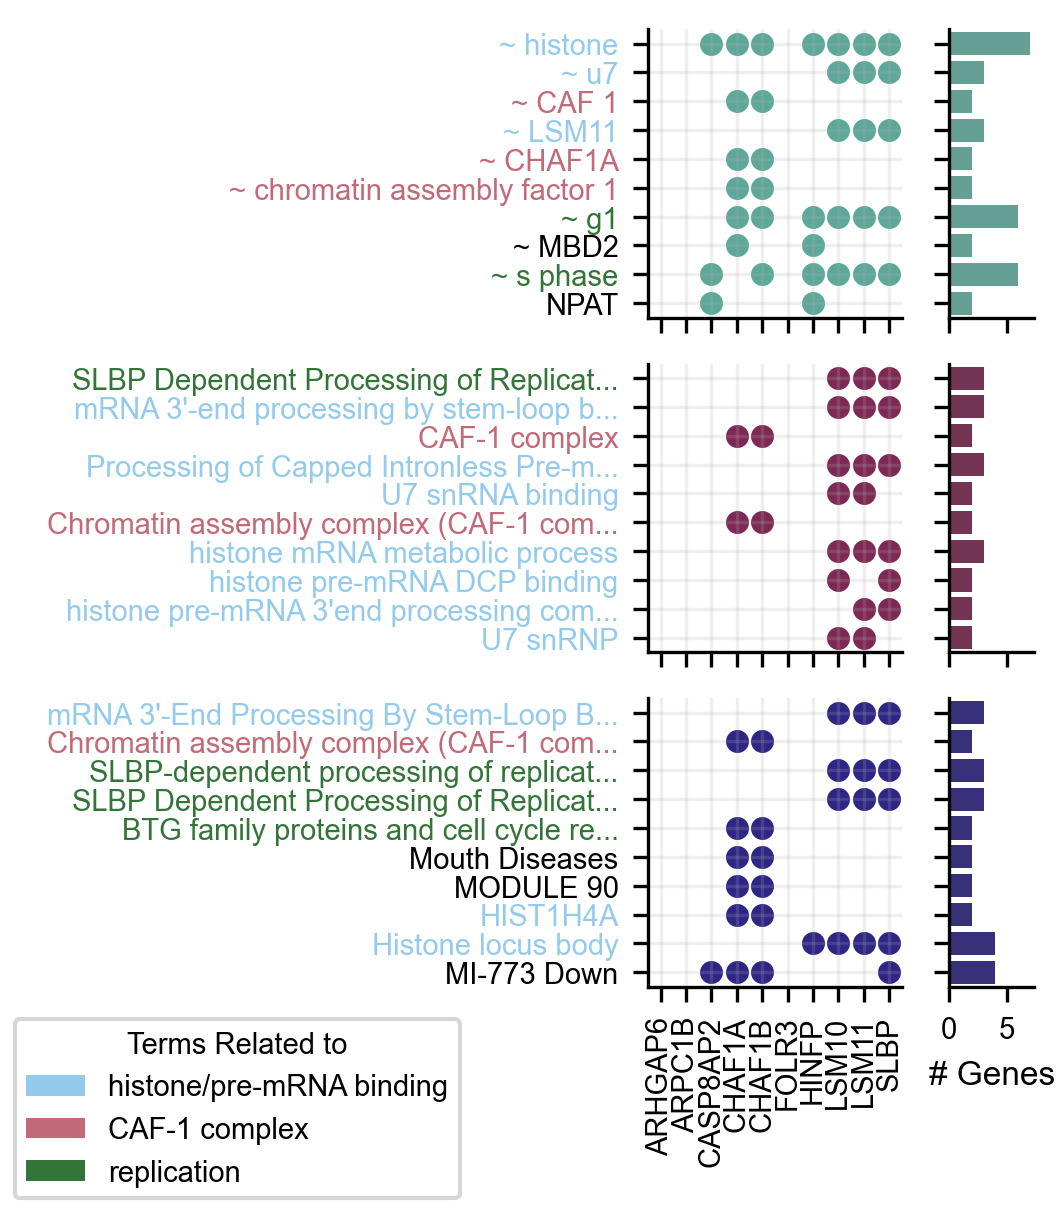

In [26]:
# ggost_map = pd.read_csv(FILEPATHS["ggost_ex2"])
# ggost_map = ggost_map.set_index("term_name")["intersections"].str.replace(",", " ").loc[lambda x: ~x.index.duplicated()]

plot_examples(
    exs[("Perturb-seq\nPerturbation\nClusters", "histone/nucleosome synthesis")],
    tea, comps,
    path=FILEPATHS["Fig4_right"],
    to_color={
        "histone/pre-mRNA binding":("histone|h4|HIST|SLBP|u7|mRNA|LSM", PALETTE[4]),
        "CAF-1 complex":("chromatin|CAF|CHAF|chroma",PALETTE[5],),        
        "replication":("g1|phase|cell cycle|replication", PALETTE[7]), 
    }, width_ratios=(3,1), figsize=(3.5,4),
    # gene_map={"g:GOSt":ggost_map},
)
plt.savefig("../../figure-panels/Fig4_right.jpg", bbox_inches="tight")
plt.show()